# The development of Italian Startups during their first years

In this project the development of 331 Italian Startups will be analysed along the dimensions of size growth and profitability with the help of PCA and then a possible classification of these companies will be proposed with the help of the Kmeans algorithm. 

The sample was taken from the list of Startups operating in Italy, which can be found on the website of the Chamber of Commerce Business Register at the following address __[link](https://startup.registroimprese.it/isin/static/startup/index.html?slideJump=32)__. The dataset was downloaded on 8 March 2021. It contains information on 12,291 companies, including the year of registration in the Startups section, which is used as the reference year for the financial statements analysed with the help of the __[AIDA](https://www.bvdinfo.com/it-it/le-nostre-soluzioni/dati/nazionali/aida)__ database. The sample examined was drawn from all Italian Startups that carry out software production, IT consulting and related activities (ATECO code 62) for which at least three consecutive balance sheets are available from the AIDA database following the year of registration in the Startup section. 

## Introduction

The AIDA dataset contains information on economic and financial indicators for 371 companies for the three financial statements following the date of their registration in the Startup section. Specifically, it presents for each balance sheet the three growth indicators most commonly used in the literature, such as sales, employees and total assets, and five financial indicators, such as value added, net profit, operating profit, pre-tax profit and cash flow. In fact, taken together growth and financial performance provide an excellent description of the results achieved by a company. The following identifying variables have also been added to these balance sheet items:

- **ragione sociale**:  company name
- **anno iscrizione**:  the year of the company's registration in the Startup section
- **anni disponibili**: the number of available balance sheets following the year of the company's registration in the Startup Section
- **codice fiscale**:  11-digit identification code for each company

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None) 

df = pd.read_excel('indexes.xlsx', converters= {'codice fiscale':str}) # I convert the variable 'codice fiscale' into a sting
# to prevent it from being transformed into a number and changing its value
df.head()

,ragione sociale,anno iscrizione,anni disponibili,codice fiscale,Ricavi delle vendite\nmigl EUR -\n1,Ricavi delle vendite\nmigl EUR -\n2,Ricavi delle vendite\nmigl EUR -\n3,Dipendenti\n1,Dipendenti\n2,Dipendenti\n3,Totale Attività\nmigl EUR -\n1,Totale Attività\nmigl EUR -\n2,Totale Attività\nmigl EUR -\n3,Valore Aggiunto\nmigl EUR -\n1,Valore Aggiunto\nmigl EUR -\n2,Valore Aggiunto\nmigl EUR -\n3,Risultato Netto\nmigl EUR -\n1,Risultato Netto\nmigl EUR -\n2,Risultato Netto\nmigl EUR -\n3,Risultato Operativo\nmigl EUR -\n1,Risultato Operativo\nmigl EUR -\n2,Risultato Operativo\nmigl EUR -\n3,Risultato Ante Imposte\nmigl EUR -\n1,Risultato Ante Imposte\nmigl EUR -\n2,Risultato Ante Imposte\nmigl EUR -\n3,Cash Flow\n1,Cash Flow\n2,Cash Flow\n3
0,RECLIFE S.R.L.,2014,3,02831050808,0.000,3.000,0.150,1,0,0,18.795,18.954,6.974,66.831,2.347,-0.266,-2.363,1.662,-0.725,-2.363,1.662,-0.266,-2.363,1.662,-0.266,-2.363,2.347,-0.725
1,MED4FIT S.R.L.,2014,5,02833750801,0.000,0.000,0.000,1,1,1,24.344,20.217,18.936,-7.392,-5.320,0.873,-11.150,-9.287,-0.574,-11.111,-9.287,-0.578,-11.150,-9.287,-0.574,-7.457,-5.385,0.812
2,SMARTWORK S.R.L.,2014,3,03311690832,458.986,47.881,187.111,9,9,9,509.523,358.197,280.454,399.051,132.113,359.873,113.050,-24.669,37.431,168.444,-37.370,36.432,168.136,-38.443,36.110,195.644,91.478,169.499
3,XOKO S.R.L.,2014,5,05287350655,45.000,44.366,247.199,1,2,3,145.527,225.812,559.137,-73.154,-44.000,37.511,-63.787,-100.560,-118.843,-83.237,-128.210,-136.640,-83.625,-128.997,-148.003,-61.658,-76.503,-29.361
4,RHEI SRL,2014,5,08874740965,249.094,289.093,437.100,0,0,2,52.084,179.520,210.600,8.686,12.018,47.991,3.603,3.294,2.360,7.702,8.325,5.907,7.371,7.715,5.201,4.587,6.987,9.320


,ragione sociale,anno iscrizione,anni disponibili,codice fiscale,Ricavi delle vendite\nmigl EUR -\n1,Ricavi delle vendite\nmigl EUR -\n2,Ricavi delle vendite\nmigl EUR -\n3,Dipendenti\n1,Dipendenti\n2,Dipendenti\n3,Totale Attività\nmigl EUR -\n1,Totale Attività\nmigl EUR -\n2,Totale Attività\nmigl EUR -\n3,Valore Aggiunto\nmigl EUR -\n1,Valore Aggiunto\nmigl EUR -\n2,Valore Aggiunto\nmigl EUR -\n3,Risultato Netto\nmigl EUR -\n1,Risultato Netto\nmigl EUR -\n2,Risultato Netto\nmigl EUR -\n3,Risultato Operativo\nmigl EUR -\n1,Risultato Operativo\nmigl EUR -\n2,Risultato Operativo\nmigl EUR -\n3,Risultato Ante Imposte\nmigl EUR -\n1,Risultato Ante Imposte\nmigl EUR -\n2,Risultato Ante Imposte\nmigl EUR -\n3,Cash Flow\n1,Cash Flow\n2,Cash Flow\n3
0,RECLIFE S.R.L.,2014,3,02831050808,0.000,3.000,0.150,1,0,0,18.795,18.954,6.974,66.831,2.347,-0.266,-2.363,1.662,-0.725,-2.363,1.662,-0.266,-2.363,1.662,-0.266,-2.363,2.347,-0.725
1,MED4FIT S.R.L.,2014,5,02833750801,0.000,0.000,0.000,1,1,1,24.344,20.217,18.936,-7.392,-5.320,0.873,-11.150,-9.287,-0.574,-11.111,-9.287,-0.578,-11.150,-9.287,-0.574,-7.457,-5.385,0.812
2,SMARTWORK S.R.L.,2014,3,03311690832,458.986,47.881,187.111,9,9,9,509.523,358.197,280.454,399.051,132.113,359.873,113.050,-24.669,37.431,168.444,-37.370,36.432,168.136,-38.443,36.110,195.644,91.478,169.499
3,XOKO S.R.L.,2014,5,05287350655,45.000,44.366,247.199,1,2,3,145.527,225.812,559.137,-73.154,-44.000,37.511,-63.787,-100.560,-118.843,-83.237,-128.210,-136.640,-83.625,-128.997,-148.003,-61.658,-76.503,-29.361
4,RHEI SRL,2014,5,08874740965,249.094,289.093,437.100,0,0,2,52.084,179.520,210.600,8.686,12.018,47.991,3.603,3.294,2.360,7.702,8.325,5.907,7.371,7.715,5.201,4.587,6.987,9.320


I am changing the name of the columns so that each balance sheet item and the year following the year in which the company was registered in the Startup section can be more easily identified.

In [3]:
def change_name(x):
    new_columns = {}
    for column in x:
            name = column.replace('\nmigl EUR','').replace('\n','_').replace(' -','').replace(' ','_').lower()
            new_columns[column] = name
    return new_columns

new_columns = change_name(df.columns)
df.rename(columns = new_columns, inplace = True)

df.columns

Index(['ragione_sociale', 'anno_iscrizione', 'anni_disponibili',
       'codice_fiscale', 'ricavi_delle_vendite_1', 'ricavi_delle_vendite_2',
       'ricavi_delle_vendite_3', 'dipendenti_1', 'dipendenti_2',
       'dipendenti_3', 'totale_attività_1', 'totale_attività_2',
       'totale_attività_3', 'valore_aggiunto_1', 'valore_aggiunto_2',
       'valore_aggiunto_3', 'risultato_netto_1', 'risultato_netto_2',
       'risultato_netto_3', 'risultato_operativo_1', 'risultato_operativo_2',
       'risultato_operativo_3', 'risultato_ante_imposte_1',
       'risultato_ante_imposte_2', 'risultato_ante_imposte_3', 'cash_flow_1',
       'cash_flow_2', 'cash_flow_3'],
      dtype='object')

Index(['ragione_sociale', 'anno_iscrizione', 'anni_disponibili',
       'codice_fiscale', 'ricavi_delle_vendite_1', 'ricavi_delle_vendite_2',
       'ricavi_delle_vendite_3', 'dipendenti_1', 'dipendenti_2',
       'dipendenti_3', 'totale_attività_1', 'totale_attività_2',
       'totale_attività_3', 'valore_aggiunto_1', 'valore_aggiunto_2',
       'valore_aggiunto_3', 'risultato_netto_1', 'risultato_netto_2',
       'risultato_netto_3', 'risultato_operativo_1', 'risultato_operativo_2',
       'risultato_operativo_3', 'risultato_ante_imposte_1',
       'risultato_ante_imposte_2', 'risultato_ante_imposte_3', 'cash_flow_1',
       'cash_flow_2', 'cash_flow_3'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ragione_sociale           371 non-null    object 
 1   anno_iscrizione           371 non-null    int64  
 2   anni_disponibili          371 non-null    int64  
 3   codice_fiscale            371 non-null    object 
 4   ricavi_delle_vendite_1    371 non-null    float64
 5   ricavi_delle_vendite_2    371 non-null    float64
 6   ricavi_delle_vendite_3    371 non-null    float64
 7   dipendenti_1              371 non-null    object 
 8   dipendenti_2              371 non-null    object 
 9   dipendenti_3              371 non-null    object 
 10  totale_attività_1         371 non-null    float64
 11  totale_attività_2         371 non-null    float64
 12  totale_attività_3         371 non-null    float64
 13  valore_aggiunto_1         371 non-null    float64
 14  valore_agg

In each of the three years examined, the variables expressing the number of employees are not considered to be *float64* like the other variables, but *object*. Therefore I am going to investigate the values assumed by these variables.

In [5]:
print("Values assumed by the variable 'dipendenti_1': ", '\n', df.dipendenti_1.value_counts())
print('\n')
print("Values assumed by the variable 'dipendenti_2': ", '\n', df.dipendenti_2.value_counts())
print('\n')
print("Values assumed by the variable 'dipendenti_3': ", '\n', df.dipendenti_3.value_counts())

Values assumed by the variable 'dipendenti_1':  
 0       158
1        85
2        39
3        22
4        13
n.d.     11
6        11
5        10
8         6
7         5
12        3
9         2
10        2
17        1
26        1
20        1
16        1
Name: dipendenti_1, dtype: int64


Values assumed by the variable 'dipendenti_2':  
 0       135
1        74
2        37
3        28
n.d.     20
4        15
5        15
6        12
7         9
9         6
10        4
8         4
12        2
26        2
11        2
17        1
13        1
14        1
18        1
16        1
19        1
Name: dipendenti_2, dtype: int64


Values assumed by the variable 'dipendenti_3':  
 0       137
1        52
2        41
3        28
4        21
n.d.     17
7        13
5        12
6        12
8         9
9         7
12        5
10        4
15        3
14        2
18        2
28        1
25        1
41        1
13        1
16        1
20        1
Name: dipendenti_3, dtype: int64
Values assumed by the varia

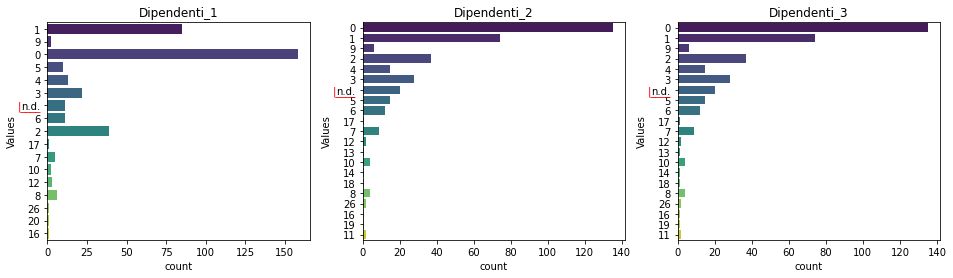

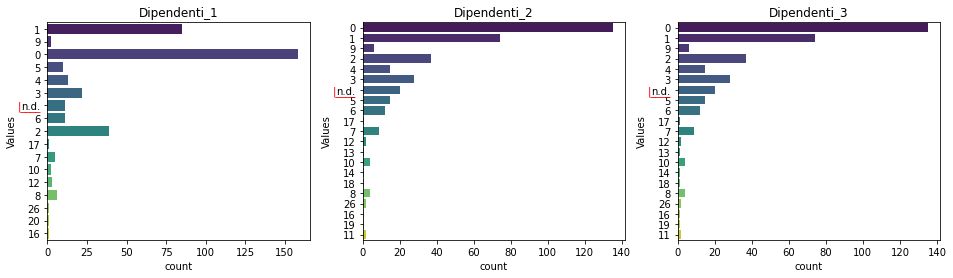

In [6]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(16,4))
sb.countplot(ax = ax1, y = df['dipendenti_1'], palette='viridis', orient='h')
ax1.set_title('Dipendenti_1')
ax1.set_ylabel('Values')
ax1.text(x = -18.5, y = 6.2, s = '|____', color = 'r')

sb.countplot(ax = ax2, y = df['dipendenti_2'], palette='viridis', orient='h')
ax2.set_title('Dipendenti_2')
ax2.set_ylabel('Values')
ax2.text(x = -16, y = 6.3, s = '|____', color = 'r')

sb.countplot(ax = ax3, y = df['dipendenti_2'], palette='viridis', orient='h')
ax3.set_title('Dipendenti_3')
ax3.set_ylabel('Values')
ax3.text(x = -16, y = 6.3, s = '|____', color = 'r')


plt.show()

During the import of the dataset the value 'n.d.' was not detected by Pandas as missing value. I convert this value to *nan* and transform the employee variables into variables of type *float*. 

In [7]:
for i in df[['dipendenti_1', 'dipendenti_2', 'dipendenti_3']]:
                 df[i].mask(df[i] == 'n.d.', inplace=True)     

df[['dipendenti_1', 'dipendenti_2', 'dipendenti_3']] = df[['dipendenti_1', 'dipendenti_2', 'dipendenti_3']].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ragione_sociale           371 non-null    object 
 1   anno_iscrizione           371 non-null    int64  
 2   anni_disponibili          371 non-null    int64  
 3   codice_fiscale            371 non-null    object 
 4   ricavi_delle_vendite_1    371 non-null    float64
 5   ricavi_delle_vendite_2    371 non-null    float64
 6   ricavi_delle_vendite_3    371 non-null    float64
 7   dipendenti_1              360 non-null    float64
 8   dipendenti_2              351 non-null    float64
 9   dipendenti_3              354 non-null    float64
 10  totale_attività_1         371 non-null    float64
 11  totale_attività_2         371 non-null    float64
 12  totale_attività_3         371 non-null    float64
 13  valore_aggiunto_1         371 non-null    float64
 14  valore_agg

In addition to the values for the number of employees in all three years, the dataset is also missing three values for cash flow in the first year. I create a copy of the initial dataset and delete the rows where values are missing.

In [8]:
DF = df.copy()
DF.dropna(axis = 0, inplace = True)

In [9]:
DF.describe()

,anno_iscrizione,anni_disponibili,ricavi_delle_vendite_1,ricavi_delle_vendite_2,ricavi_delle_vendite_3,dipendenti_1,dipendenti_2,dipendenti_3,totale_attività_1,totale_attività_2,totale_attività_3,valore_aggiunto_1,valore_aggiunto_2,valore_aggiunto_3,risultato_netto_1,risultato_netto_2,risultato_netto_3,risultato_operativo_1,risultato_operativo_2,risultato_operativo_3,risultato_ante_imposte_1,risultato_ante_imposte_2,risultato_ante_imposte_3,cash_flow_1,cash_flow_2,cash_flow_3
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,2015.719033,3.308157,127.784006,204.983486,282.726054,1.876133,2.435045,2.966767,251.780625,392.107366,522.775384,36.005550,74.091982,104.738921,-19.440843,-22.549852,-40.612372,-18.910529,-19.352574,-33.015441,-19.280139,-21.448653,-35.970719,-5.611795,4.201900,4.089909
std,0.541799,0.500206,251.298457,374.632687,503.250161,3.092474,3.722720,4.615729,506.175247,779.962595,1026.453088,115.968686,182.394504,285.211635,114.653593,182.901846,306.655137,120.223179,198.336981,318.475036,122.557796,197.865693,319.413332,101.881458,169.100579,291.255276
min,2014.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090000,1.611000,0.286000,-564.919000,-686.556000,-1710.325000,-1068.599000,-1712.509000,-3471.490000,-1075.892000,-1768.807000,-3425.443000,-1068.599000,-1712.509000,-3432.812000,-928.880000,-1553.111000,-3238.692000
25%,2015.000000,3.000000,3.490000,14.485000,24.173000,0.000000,0.000000,0.000000,32.324500,56.257000,73.980500,-2.595000,-1.001000,1.833500,-13.254000,-13.940000,-14.044500,-13.567000,-14.943500,-11.882000,-14.321000,-16.525000,-12.220000,-6.885500,-3.967500,-2.017500
50%,2016.000000,3.000000,45.000000,76.500000,101.542000,1.000000,1.000000,1.000000,95.511000,144.862000,213.856000,10.697000,22.335000,42.659000,0.085000,0.467000,1.136000,0.523000,1.323000,3.283000,0.365000,0.888000,2.554000,2.845000,6.161000,10.891000
75%,2016.000000,4.000000,136.854500,254.946000,298.195500,2.000000,3.000000,4.000000,246.351000,383.179000,524.886000,47.099500,99.713000,134.789000,5.884000,10.903500,16.895500,9.516500,15.226000,25.421000,9.047500,13.745000,22.642000,16.244000,33.499000,48.974000
max,2017.000000,5.000000,2182.328000,3237.680000,3815.210000,26.000000,26.000000,41.000000,5106.500000,10279.474000,12934.521000,852.975000,1180.316000,2475.264000,277.460000,818.636000,1590.664000,193.192000,1065.391000,2241.541000,308.228000,1062.683000,2237.877000,314.072000,915.616000,1787.811000


,anno_iscrizione,anni_disponibili,ricavi_delle_vendite_1,ricavi_delle_vendite_2,ricavi_delle_vendite_3,dipendenti_1,dipendenti_2,dipendenti_3,totale_attività_1,totale_attività_2,totale_attività_3,valore_aggiunto_1,valore_aggiunto_2,valore_aggiunto_3,risultato_netto_1,risultato_netto_2,risultato_netto_3,risultato_operativo_1,risultato_operativo_2,risultato_operativo_3,risultato_ante_imposte_1,risultato_ante_imposte_2,risultato_ante_imposte_3,cash_flow_1,cash_flow_2,cash_flow_3
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,2015.719033,3.308157,127.784006,204.983486,282.726054,1.876133,2.435045,2.966767,251.780625,392.107366,522.775384,36.005550,74.091982,104.738921,-19.440843,-22.549852,-40.612372,-18.910529,-19.352574,-33.015441,-19.280139,-21.448653,-35.970719,-5.611795,4.201900,4.089909
std,0.541799,0.500206,251.298457,374.632687,503.250161,3.092474,3.722720,4.615729,506.175247,779.962595,1026.453088,115.968686,182.394504,285.211635,114.653593,182.901846,306.655137,120.223179,198.336981,318.475036,122.557796,197.865693,319.413332,101.881458,169.100579,291.255276
min,2014.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090000,1.611000,0.286000,-564.919000,-686.556000,-1710.325000,-1068.599000,-1712.509000,-3471.490000,-1075.892000,-1768.807000,-3425.443000,-1068.599000,-1712.509000,-3432.812000,-928.880000,-1553.111000,-3238.692000
25%,2015.000000,3.000000,3.490000,14.485000,24.173000,0.000000,0.000000,0.000000,32.324500,56.257000,73.980500,-2.595000,-1.001000,1.833500,-13.254000,-13.940000,-14.044500,-13.567000,-14.943500,-11.882000,-14.321000,-16.525000,-12.220000,-6.885500,-3.967500,-2.017500
50%,2016.000000,3.000000,45.000000,76.500000,101.542000,1.000000,1.000000,1.000000,95.511000,144.862000,213.856000,10.697000,22.335000,42.659000,0.085000,0.467000,1.136000,0.523000,1.323000,3.283000,0.365000,0.888000,2.554000,2.845000,6.161000,10.891000
75%,2016.000000,4.000000,136.854500,254.946000,298.195500,2.000000,3.000000,4.000000,246.351000,383.179000,524.886000,47.099500,99.713000,134.789000,5.884000,10.903500,16.895500,9.516500,15.226000,25.421000,9.047500,13.745000,22.642000,16.244000,33.499000,48.974000
max,2017.000000,5.000000,2182.328000,3237.680000,3815.210000,26.000000,26.000000,41.000000,5106.500000,10279.474000,12934.521000,852.975000,1180.316000,2475.264000,277.460000,818.636000,1590.664000,193.192000,1065.391000,2241.541000,308.228000,1062.683000,2237.877000,314.072000,915.616000,1787.811000


##  PCA on balance sheet items

### Creation of the PCA dataset 

In [10]:
df_years = [] 
for year in [1, 2, 3]:
    df_year = DF.iloc[:, [i for i in range(3+year, 28, 3)]].copy()
    df_year.columns = df_year.columns.str.replace('_'+str(year),'') 
    df_year.insert(0, 'anno', year) 
    
    index_year = []
    for i in np.arange(1, len(DF)+1):
        index_year.append(str(i) + '_' + str(year))
    df_year.insert(1, 'indice_anno', index_year)
    df_year.insert(2, 'codice_fiscale', DF['codice_fiscale'].copy().astype(str))
    df_years.append(df_year)
    
DF_PCA = pd.concat([df_years[0], df_years[1], df_years[2]])
DF_PCA.sort_index(inplace=True)
DF_PCA.index = list(range(len(DF_PCA)))

DF_PCA

,anno,indice_anno,codice_fiscale,ricavi_delle_vendite,dipendenti,totale_attività,valore_aggiunto,risultato_netto,risultato_operativo,risultato_ante_imposte,cash_flow
0,1,1_1,02831050808,0.000,1.0,18.795,66.831,-2.363,-2.363,-2.363,-2.363
1,3,1_3,02831050808,0.150,0.0,6.974,-0.266,-0.725,-0.266,-0.266,-0.725
2,2,1_2,02831050808,3.000,0.0,18.954,2.347,1.662,1.662,1.662,2.347
3,1,2_1,02833750801,0.000,1.0,24.344,-7.392,-11.150,-11.111,-11.150,-7.457
4,3,2_3,02833750801,0.000,1.0,18.936,0.873,-0.574,-0.578,-0.574,0.812
...,...,...,...,...,...,...,...,...,...,...,...
988,2,330_2,14113281001,1901.688,9.0,1618.628,806.007,225.055,275.930,274.748,344.048
989,1,330_1,14113281001,862.751,4.0,860.205,389.855,163.223,193.192,191.427,239.123
990,1,331_1,14356531005,146.249,0.0,119.899,28.168,2.521,8.585,7.073,22.104
991,2,331_2,14356531005,242.035,1.0,237.522,91.826,-22.723,-18.518,-20.056,40.098


,anno,indice_anno,codice_fiscale,ricavi_delle_vendite,dipendenti,totale_attività,valore_aggiunto,risultato_netto,risultato_operativo,risultato_ante_imposte,cash_flow
0,1,1_1,02831050808,0.000,1.0,18.795,66.831,-2.363,-2.363,-2.363,-2.363
1,3,1_3,02831050808,0.150,0.0,6.974,-0.266,-0.725,-0.266,-0.266,-0.725
2,2,1_2,02831050808,3.000,0.0,18.954,2.347,1.662,1.662,1.662,2.347
3,1,2_1,02833750801,0.000,1.0,24.344,-7.392,-11.150,-11.111,-11.150,-7.457
4,3,2_3,02833750801,0.000,1.0,18.936,0.873,-0.574,-0.578,-0.574,0.812
...,...,...,...,...,...,...,...,...,...,...,...
988,2,330_2,14113281001,1901.688,9.0,1618.628,806.007,225.055,275.930,274.748,344.048
989,1,330_1,14113281001,862.751,4.0,860.205,389.855,163.223,193.192,191.427,239.123
990,1,331_1,14356531005,146.249,0.0,119.899,28.168,2.521,8.585,7.073,22.104
991,2,331_2,14356531005,242.035,1.0,237.522,91.826,-22.723,-18.518,-20.056,40.098


### Principal component analysis

Since the balance sheet items have very different variances, just think about the number of employees and the total assets, I standardise the variables before carrying out the PCA.

In [11]:
from sklearn.preprocessing import StandardScaler

x = DF_PCA.iloc[:,3:].copy() 
x_standard = StandardScaler().fit_transform(x)

x_standard

array([[-0.51978714, -0.36742537, -0.45914952, ...,  0.09416943,
         0.10179033, -0.01604972],
       [-0.51940711, -0.6250902 , -0.47381505, ...,  0.10339865,
         0.11098956, -0.0079764 ],
       [-0.5121866 , -0.6250902 , -0.45895226, ...,  0.11188409,
         0.11944741,  0.00716475],
       ...,
       [-0.14926327, -0.6250902 , -0.33371651, ...,  0.1423533 ,
         0.14318466,  0.1045423 ],
       [ 0.09341188, -0.36742537, -0.18778947, ...,  0.02306873,
         0.02417376,  0.19323044],
       [-0.20023251, -0.10976055,  0.37078715, ..., -0.91332151,
        -0.90743123, -0.69364111]])

array([[-0.51978714, -0.36742537, -0.45914952, ...,  0.09416943,
         0.10179033, -0.01604972],
       [-0.51940711, -0.6250902 , -0.47381505, ...,  0.10339865,
         0.11098956, -0.0079764 ],
       [-0.5121866 , -0.6250902 , -0.45895226, ...,  0.11188409,
         0.11944741,  0.00716475],
       ...,
       [-0.14926327, -0.6250902 , -0.33371651, ...,  0.1423533 ,
         0.14318466,  0.1045423 ],
       [ 0.09341188, -0.36742537, -0.18778947, ...,  0.02306873,
         0.02417376,  0.19323044],
       [-0.20023251, -0.10976055,  0.37078715, ..., -0.91332151,
        -0.90743123, -0.69364111]])

In [12]:
from sklearn.decomposition import PCA

pca = PCA()
principal_components = pca.fit_transform(x_standard)

cumsum = np.cumsum(pca.explained_variance_ratio_)
eigenvalue = pca.explained_variance_

print('Cumulative variance from components: ', '\n', cumsum)
print('-------------------------------------------------')
print('Value assumed by the eigenvalues: ', '\n', eigenvalue)

Cumulative variance from components:  
 [0.59779302 0.86598544 0.93495848 0.98440182 0.99390282 0.99903164
 0.99987891 1.        ]
-------------------------------------------------
Value assumed by the eigenvalues:  
 [4.78716507e+00 2.14770220e+00 5.52340573e-01 3.95945452e-01
 7.60845756e-02 4.10719427e-02 6.78500320e-03 9.69700485e-04]
Cumulative variance from components:  
 [0.59779302 0.86598544 0.93495848 0.98440182 0.99390282 0.99903164
 0.99987891 1.        ]
-------------------------------------------------
Value assumed by the eigenvalues:  
 [4.78716507e+00 2.14770220e+00 5.52340573e-01 3.95945452e-01
 7.60845756e-02 4.10719427e-02 6.78500320e-03 9.69700485e-04]


The first two components of the PCA explain a substantial percentage of the variance presented in the dataset (87%) and Kaiser's rule suggests the relevance of the first two components. Therefore, I visualise the relationship between the first two principal components and the 8 balance sheet items analysed in order to interpret the dimensions derived from the PCA.

In [13]:
pca_2 = PCA(2)
principal_components_2 = pca_2.fit_transform(x_standard)

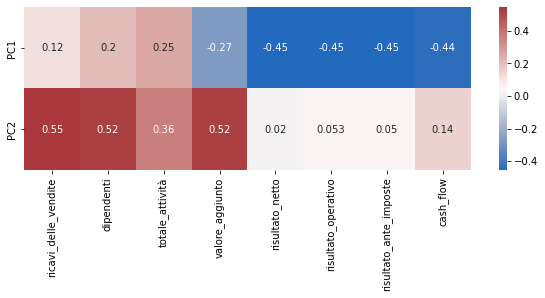

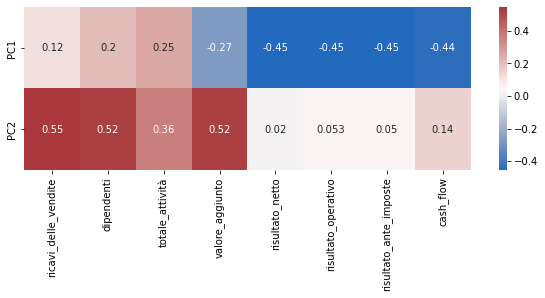

In [14]:
comps = pd.DataFrame(pca_2.components_, columns= DF_PCA.columns[3:]).copy()
plt.figure(figsize= (10,3))
sb.heatmap(comps, cmap="vlag", annot=True, yticklabels=['PC1', 'PC2']);

From the graph, the first principal component appears to be negatively correlated with the financial performance indicators, so it has been identified as a measure of profitability for Startups, while the second principal component appears to be more positively correlated with the growth indicators, so it has been identified as a measure of business growth.

## Classification of Startups according to their growth trajectories

In order to understand the movement of the companies on the factorial map created, I use the values obtained from the PCA on the two main components to perform a classification of the trajectories followed by the Startups. I reprocess the dataset again and then add these values for each company in the respective years.

In [15]:
df_PCs = pd.DataFrame(principal_components_2, columns = ['PC_1', 'PC_2'])
df_PCs.insert(0,'codice_fiscale', DF_PCA['codice_fiscale'].copy())
df_PCs.insert(0,'indice_anno', DF_PCA['indice_anno'].copy())
df_PCs.insert(0,'anno', DF_PCA['anno'].copy())
df_PCs.head()

,anno,indice_anno,codice_fiscale,PC_1,PC_2
0,1,1_1,02831050808,-0.379417,-0.642547
1,3,1_3,02831050808,-0.363897,-0.948412
2,2,1_2,02831050808,-0.381984,-0.929277
3,1,2_1,02833750801,-0.217435,-0.834866
4,3,2_3,02833750801,-0.311891,-0.804846


,anno,indice_anno,codice_fiscale,PC_1,PC_2
0,1,1_1,02831050808,-0.379417,-0.642547
1,3,1_3,02831050808,-0.363897,-0.948412
2,2,1_2,02831050808,-0.381984,-0.929277
3,1,2_1,02833750801,-0.217435,-0.834866
4,3,2_3,02833750801,-0.311891,-0.804846


In [16]:
df_years = [] 
for year in [1, 2, 3]:
    df_year = df_PCs[df_PCs['anno']==year].copy()
    df_year.reset_index(inplace=True, drop=True)
    df_year.columns= ['anno','indice_anno','codice_fiscale',str(year)+'_PC1', str(year)+'_PC2']
    df_years.append(df_year)

df_PCs = pd.concat([df_years[0], df_years[1].iloc[:,3:], df_years[2].iloc[:,3:]], join='outer', axis=1)
df_PCs

,anno,indice_anno,codice_fiscale,1_PC1,1_PC2,2_PC1,2_PC2,3_PC1,3_PC2
0,1,1_1,02831050808,-0.379417,-0.642547,-0.381984,-0.929277,-0.363897,-0.948412
1,1,2_1,02833750801,-0.217435,-0.834866,-0.237139,-0.829014,-0.311891,-0.804846
2,1,3_1,03311690832,-1.451867,2.351537,0.059896,0.864613,-0.812348,1.689498
3,1,4_1,05287350655,0.434281,-0.960130,0.762940,-0.751918,0.865220,0.042284
4,1,5_1,08874740965,-0.340058,-0.553832,-0.298945,-0.431431,-0.181296,0.147099
...,...,...,...,...,...,...,...,...,...
326,1,327_1,09868270969,-0.390681,-0.676447,-0.480026,-0.480712,-0.318055,-0.205234
327,1,328_1,09888350965,-1.394122,-0.156172,-0.238393,-0.762816,-0.576633,-0.420251
328,1,329_1,11716270019,0.036802,0.288431,0.851576,2.105569,0.393177,5.507630
329,1,330_1,14113281001,-1.766950,2.416749,-2.187857,6.027853,-2.841709,9.057273


,anno,indice_anno,codice_fiscale,1_PC1,1_PC2,2_PC1,2_PC2,3_PC1,3_PC2
0,1,1_1,02831050808,-0.379417,-0.642547,-0.381984,-0.929277,-0.363897,-0.948412
1,1,2_1,02833750801,-0.217435,-0.834866,-0.237139,-0.829014,-0.311891,-0.804846
2,1,3_1,03311690832,-1.451867,2.351537,0.059896,0.864613,-0.812348,1.689498
3,1,4_1,05287350655,0.434281,-0.960130,0.762940,-0.751918,0.865220,0.042284
4,1,5_1,08874740965,-0.340058,-0.553832,-0.298945,-0.431431,-0.181296,0.147099
...,...,...,...,...,...,...,...,...,...
326,1,327_1,09868270969,-0.390681,-0.676447,-0.480026,-0.480712,-0.318055,-0.205234
327,1,328_1,09888350965,-1.394122,-0.156172,-0.238393,-0.762816,-0.576633,-0.420251
328,1,329_1,11716270019,0.036802,0.288431,0.851576,2.105569,0.393177,5.507630
329,1,330_1,14113281001,-1.766950,2.416749,-2.187857,6.027853,-2.841709,9.057273


#### I apply the Kmeans algorithm to classify Startups according to the values taken over time on the two main components.

In [17]:
from sklearn.cluster import KMeans

x_kmeans = df_PCs.iloc[:,3:].copy()

KMeans = KMeans(n_clusters=3, random_state=1000)
clusters = KMeans.fit_predict(x_kmeans) 

In [18]:
print('Number of Startups in each group:')
for i in range(3):
    n = clusters[clusters==i]      
    print('GROUP'+str(i)+':', len(n))

Number of Startups in each group:
GROUP0: 292
GROUP1: 6
GROUP2: 33
Number of Startups in each group:
GROUP0: 292
GROUP1: 6
GROUP2: 33


In order to understand the classification carried out with Kmeans I add the column *clusters* to the dataset containing the main components and rework the dataset in order to visualise the development of the Startups over the three years analysed.

In [19]:
df_PCs['clusters'] = clusters

df_years = [] 
for year in [1, 2, 3]:
    df_year = df_PCs[['codice_fiscale', str(year)+'_PC1', str(year)+'_PC2', 'clusters']].copy()
    df_year.columns = ['codice_fiscale', 'PC_1', 'PC_2', 'clusters']
    df_year['anno'] = year
    
    df_years.append(df_year)

df_plot = pd.concat([df_years[0], df_years[1], df_years[2]], join='outer')
df_plot.sort_values(['codice_fiscale', 'anno'], inplace=True)
df_plot.reset_index(inplace=True, drop=True)

In [20]:
df_plot.head()

,codice_fiscale,PC_1,PC_2,clusters,anno
0,00985770148,1.248830,-1.051132,0,1
1,00985770148,3.391902,-0.456804,0,2
2,00985770148,6.519252,-0.214983,0,3
3,01135860573,-0.370043,-0.936520,0,1
4,01135860573,-0.493494,-0.831950,0,2


,codice_fiscale,PC_1,PC_2,clusters,anno
0,00985770148,1.248830,-1.051132,0,1
1,00985770148,3.391902,-0.456804,0,2
2,00985770148,6.519252,-0.214983,0,3
3,01135860573,-0.370043,-0.936520,0,1
4,01135860573,-0.493494,-0.831950,0,2


#### It is also possible to obtain an animated  graph of the development of the Startups during the three years through "*plotly*" library as follow:

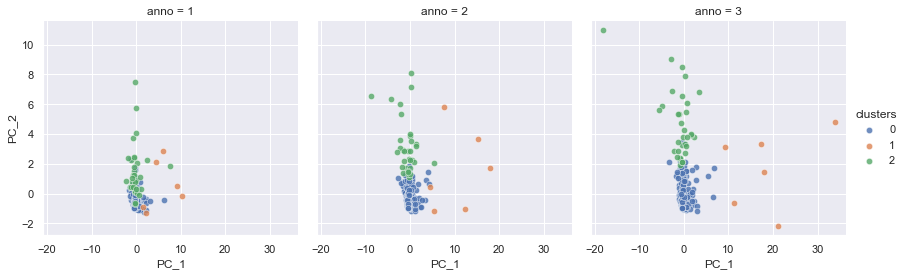

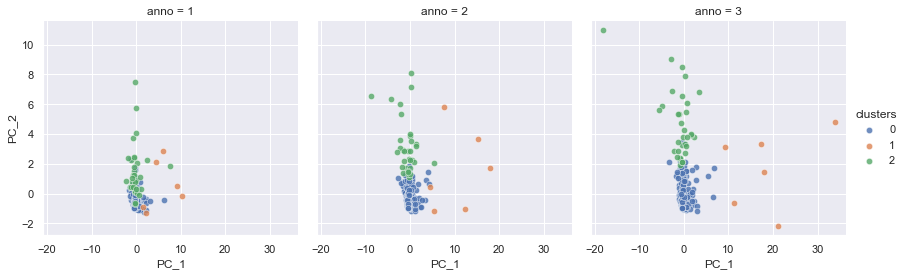

In [21]:
sb.set_theme(style='darkgrid')

g = sb.FacetGrid(df_plot, col="anno", hue='clusters', height=4)
g.map(sb.scatterplot, 'PC_1', 'PC_2', s=40, alpha=0.8)
g.add_legend();

In [36]:
import plotly.offline as py

fig = px.scatter(df_plot.iloc[:,1:3], x='PC_1', y='PC_2', 
                 color=df_plot['clusters'].astype(str),
                 animation_frame=df_plot['anno'],
                 color_discrete_sequence=["green","blue","red"]
                 )

fig.update_traces(textposition='top center')

py.iplot(fig, filename='PlotlyPlot_PCA3years')

In [35]:
from IPython.display import HTML

HTML(filename="PlotlyPlot_PCA3years.html")

Recalling that the first main component is negatively correlated with profitability and the second is positively correlated with dimensional growth, from the graph it is possible to distinguish the clusters calculated as follows:
- **group 0**: Startups with stable levels of growth and profitability over time, but no particular returns over the three years; 
- **group 1**: Startups showing a condition of great size and financial development;
- **group 2**: Startups exhibiting fair levels of growth, but poor financial performance.